In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100,n_features=1,n_targets=1,n_informative=1,noise=20,random_state=42)

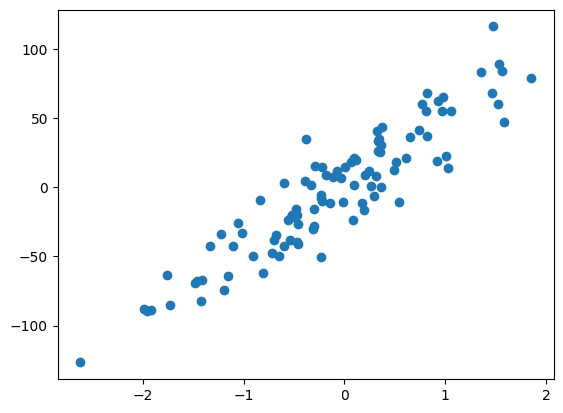

In [3]:
plt.scatter(X,y);

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[47.13323967]
2.3302306410539453


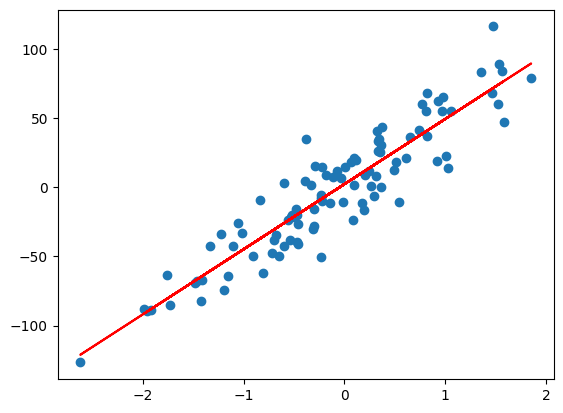

In [5]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[46.747264]
0.19844442845175525


In [8]:
L = Lasso(alpha=0.1)
L.fit(X_train,y_train)
print(L.coef_)
print(L.intercept_)

[46.62498403]
0.18271256786077572


In [9]:
L = Lasso(alpha=1)
L.fit(X_train,y_train)
print(L.coef_)
print(L.intercept_)

[45.52446436]
0.04112582254192798


In [10]:
L = Lasso(alpha=10)
L.fit(X_train,y_train)
print(L.coef_)
print(L.intercept_)

[34.51926762]
-1.3747416306465485


In [11]:
class myLasso:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = ((y_train - y_train.mean()) * (X_train - X_train.mean())).sum()
        den = ((X_train - X_train.mean()) ** 2).sum()

        m_pos = (num - self.alpha) / den
        m_neg = (num + self.alpha) / den

        b_pos = y_train.mean() - m_pos * X_train.mean()
        b_neg = y_train.mean() - m_neg * X_train.mean()

        y_pred_pos = m_pos * X_train + b_pos
        y_pred_neg = m_neg * X_train + b_neg

        loss_pos = ((y_train - y_pred_pos) ** 2).sum() + self.alpha * abs(m_pos)
        loss_neg = ((y_train - y_pred_neg) ** 2).sum() + self.alpha * abs(m_neg)

        if loss_pos < loss_neg:
            self.m = m_pos
            self.b = b_pos
        else:
            self.m = m_neg
            self.b = b_neg

        print(f"Slope: {self.m}, Intercept: {self.b}")

    def predict(self, X_valid):
        return self.m * X_valid + self.b


In [16]:
ls = myLasso(alpha=0.1)
ls.fit(X_train,y_train)

Slope: -0.0015284995469200117, Intercept: -5.815995417442014


Later I realised that LASSO do not work on closed loop form solutions due to the non-differentiable term lambda mod m ofc. This code snippet was for study purpose only and to develop intuitions. LASSO internally follows Gradient Descent thus making it an iterative approached algorithm.